In [16]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix , precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
#warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE 

import warnings
warnings.filterwarnings('ignore')


In [17]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [18]:
%config InlineBackend.figure_format = "svg"

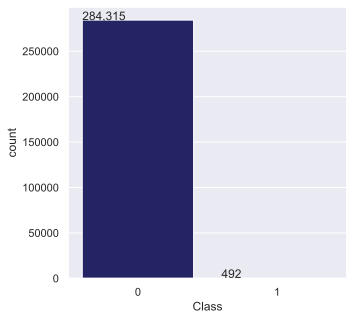

In [19]:
plt.figure(figsize=(5,5))
df['Class'].value_counts()
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Class", data=df,color = "midnightblue" )
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')),
            (p.get_x(), p.get_height()))

In [20]:
df_train, df_test = train_test_split(df, test_size=0.2,random_state=123,stratify=df["Class"])
df_train, df_val = train_test_split(df_train, test_size=0.25,random_state=123,stratify=df_train["Class"])

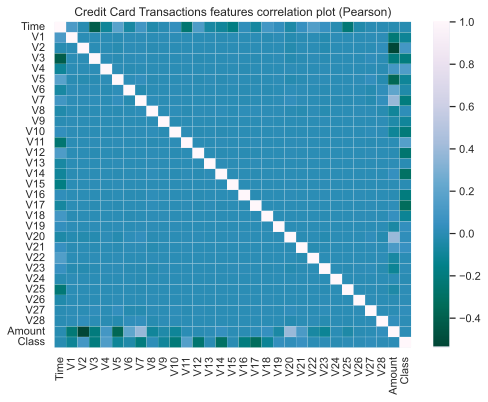

In [21]:
plt.figure(figsize = (8,6))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df_train.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="PuBuGn_r")
plt.show()

In [23]:
df_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,...,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000
mean,94776.308632,0.001168,-0.000552,-0.001467,-0.003445,-0.003037,-0.000446,-0.002593,0.001609,-0.000250,...,0.000972,0.001976,0.002108,0.000123,-0.001374,-0.000955,0.000775,0.000118,88.277933,0.001726
std,47493.286230,1.960894,1.664025,1.513203,1.419609,1.371001,1.326401,1.224904,1.207407,1.100535,...,0.747123,0.727807,0.621273,0.605745,0.521656,0.481340,0.399386,0.326564,248.061015,0.041513
min,0.000000,-46.855047,-60.464618,-32.965346,-5.683171,-42.147898,-23.496714,-43.557242,-73.216718,-13.320155,...,-34.830382,-9.499423,-36.666000,-2.836627,-8.696627,-2.604551,-9.793568,-9.617915,0.000000,0.000000
25%,54257.500000,-0.919115,-0.599730,-0.891281,-0.856146,-0.698267,-0.767054,-0.558175,-0.207183,-0.645830,...,-0.228664,-0.540492,-0.161240,-0.354066,-0.317867,-0.327030,-0.070306,-0.053013,5.700000,0.000000
50%,84675.000000,0.019879,0.064686,0.178514,-0.025752,-0.056203,-0.273670,0.038092,0.023326,-0.051130,...,-0.029128,0.009238,-0.009962,0.041257,0.014559,-0.053201,0.001761,0.011237,22.000000,0.000000
75%,139260.000000,1.317510,0.805061,1.027226,0.739981,0.610860,0.398278,0.568317,0.328194,0.597551,...,0.187208,0.530304,0.148918,0.438644,0.348720,0.240187,0.091508,0.078321,77.000000,0.000000
max,172788.000000,2.439207,22.057729,4.226108,16.875344,34.099309,23.917837,44.054461,19.587773,10.392889,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,22.620072,18910.000000,1.000000


In [24]:
# df_train['Hour'] = df_train['Time'].apply(lambda x: np.floor(x / 3600))

# tmp = df_train.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
# df_train = pd.DataFrame(tmp)
# df_train.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
# df_train.head()

In [25]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df_train['scaled_amount'] = rob_scaler.fit_transform(df_train['Amount'].values.reshape(-1,1))
df_train['scaled_time'] = rob_scaler.fit_transform(df_train['Time'].values.reshape(-1,1))

df_train.drop(['Time','Amount'], axis=1, inplace=True)

In [26]:
df_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
97401,-0.932087,0.705828,0.800311,-2.286809,0.138517,-0.995096,0.680016,0.076154,0.391838,-1.410968,...,0.732816,-0.281890,0.030574,0.215762,-0.871058,-0.272995,-0.175114,0,-0.140533,-0.217288
62750,-0.101938,0.473848,0.322089,-0.511147,0.206996,1.083175,-1.043374,-2.447632,0.339016,-1.332940,...,0.152972,-0.247357,-1.268945,0.890849,0.694547,0.042810,0.218022,0,0.014025,-0.403070
193370,2.280793,-1.489572,-1.038026,-1.790889,-1.003971,0.064759,-1.356242,0.051946,-1.260549,1.735540,...,-0.003353,0.213888,0.160607,-0.209911,-0.197417,0.008036,-0.055208,0,-0.033661,0.534502
135078,1.158424,0.087118,0.272855,1.205079,-0.026206,0.302304,-0.131135,0.221529,0.231995,0.082498,...,-0.096479,-0.094427,-0.319892,0.640023,-0.305185,0.029366,-0.001272,0,-0.294530,-0.042093
211567,1.423250,-2.265369,-1.240829,-0.778567,-1.003333,0.247268,-0.576459,-0.119540,0.002374,0.542414,...,0.877694,-0.286573,0.051772,-0.221650,-0.096568,-0.058952,0.027431,0,5.610098,0.632840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258474,2.135960,0.150460,-2.438607,-0.014287,1.106147,-0.765626,0.738419,-0.396060,-0.094350,0.217384,...,0.598698,-0.195891,-1.045365,0.616701,-0.049778,-0.059849,-0.093663,0,-0.241374,0.870480
137798,-0.846690,0.730966,-0.267568,0.289898,2.417818,3.721125,-0.355027,1.377504,-0.763934,-0.466334,...,-0.255268,-0.249239,1.020203,0.373593,-0.205774,0.015537,0.000364,0,-0.172370,-0.027599
82661,-0.963280,1.208715,0.187550,0.952846,0.662906,-0.240493,0.127257,0.564588,-0.936360,-0.745909,...,0.371347,-0.217219,-0.423168,-0.341852,-0.312911,-0.042317,0.075818,0,-0.294530,-0.296238
259438,2.285437,-1.530372,-0.907648,-1.934569,-0.901065,0.528246,-1.524621,0.150632,-1.169894,1.677150,...,-0.829866,0.347312,-0.421398,-0.481221,-0.471778,0.026009,-0.046823,0,0.040673,0.875762


In [27]:
# Handling Imbalanced Data

In [28]:
X_train = df_train.drop(["Class"], axis = 1)
y_train = df_train["Class"]

# SMOTE

In [29]:
conda install -c conda-forge imbalanced-learn


Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [30]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=1234)

X_train, y_train = sm.fit_resample(X_train, y_train)

In [31]:
from collections import Counter
counter = Counter(y_train)
for k, v in counter.items():
    dist = v / len(y_train) * 100 
    print(f"Class= {k}, n={v} ({dist}%)")

Class= 0, n=170588 (50.0%)
Class= 1, n=170588 (50.0%)


In [32]:
#val

In [33]:
df_val['scaled_amount'] = rob_scaler.fit_transform(df_val['Amount'].values.reshape(-1,1))
df_val['scaled_time'] = rob_scaler.fit_transform(df_val['Time'].values.reshape(-1,1))
df_val.drop(['Time','Amount'], axis=1, inplace=True)

In [34]:
X_val= df_val.drop(["Class"], axis = 1)
y_val = df_val["Class"]

# Models With (SMOTE)

# Logistic Regression

### val

In [35]:
log_cfl = LogisticRegression(C=0.95, random_state=0)

log_cfl.fit(X_train, y_train)

y_predict = log_cfl.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.06      0.93      0.11        99

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

[[55442  1421]
 [    7    92]]


# KNN

### val

In [36]:
KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(X_train, y_train)

y_predict = KNN.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.46      0.88      0.60        99

    accuracy                           1.00     56962
   macro avg       0.73      0.94      0.80     56962
weighted avg       1.00      1.00      1.00     56962

[[56761   102]
 [   12    87]]


# Random Forest Classifier

### Train

In [37]:
rf_cfl = RandomForestClassifier(max_depth=2)
rf_cfl.fit(X_train, y_train)

y_predict = rf_cfl.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94    170588
           1       1.00      0.87      0.93    170588

    accuracy                           0.93    341176
   macro avg       0.94      0.93      0.93    341176
weighted avg       0.94      0.93      0.93    341176

[[169947    641]
 [ 21984 148604]]


### val

In [38]:
rf_cfl = RandomForestClassifier(n_estimators = 200)
rf_cfl.fit(X_train, y_train)

y_predict = rf_cfl.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.83      0.85        99

    accuracy                           1.00     56962
   macro avg       0.93      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

[[56850    13]
 [   17    82]]


# xgboost

In [3]:
conda install -c conda-forge xgboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/yaraaldossari/opt/anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    conda-4.11.0               |   py39h6e9494a_0        16.9 MB  conda-forge
    libxgboost-1.5.0           |       h4a89273_1         2.2 MB  conda-forge
    py-xgboost-1.5.0           |   py39h6e9494a_1         151 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    xgboost-1.5.0              |   py39h0f1f8f7_1          12 KB  conda-forge
    -----------------------------------------------------

In [39]:
from xgboost import XGBClassifier

In [40]:
import xgboost as xgb

In [41]:
#!pip install xgboost

### Train

In [42]:
# When we use the model without Smote later, the will be whit out Overfitting

In [43]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1, n_estimators = 200,max_depth=1)
xgb_cfl.fit(X_train, y_train)

y_predict = xgb_cfl.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

[18:48:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    170588
           1       0.99      0.97      0.98    170588

    accuracy                           0.98    341176
   macro avg       0.98      0.98      0.98    341176
weighted avg       0.98      0.98      0.98    341176

[[168294   2294]
 [  4344 166244]]


### Val

In [44]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1, n_estimators = 200)
xgb_cfl.fit(X_train, y_train)

y_predict = xgb_cfl.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

[18:49:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.79      0.85      0.82        99

    accuracy                           1.00     56962
   macro avg       0.90      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962

[[56841    22]
 [   15    84]]


# VotingClassifier

In [45]:
from sklearn.ensemble import VotingClassifier

### Train

In [46]:
# When we use the model without Smote later, the will be whit out Overfitting

In [47]:
vot = VotingClassifier (estimators = [('xgb', xgb_cfl), ('lt', log_cfl), ('rf', rf_cfl)], voting='soft')
vot.fit(X_train, y_train)

y_predict = vot.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

[18:50:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170588
           1       1.00      1.00      1.00    170588

    accuracy                           1.00    341176
   macro avg       1.00      1.00      1.00    341176
weighted avg       1.00      1.00      1.00    341176

[[170588      0]
 [     0 170588]]


### val

In [48]:
vot = VotingClassifier (estimators = [('xgb', xgb_cfl), ('lt', log_cfl), ('rf', rf_cfl)], voting='soft')
vot.fit(X_train, y_train)

y_predict = vot.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

[18:56:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.78      0.86      0.82        99

    accuracy                           1.00     56962
   macro avg       0.89      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962

[[56839    24]
 [   14    85]]


# AdaBoostClassifier

In [49]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [50]:
from sklearn.ensemble import AdaBoostClassifier

### Train

In [51]:
from sklearn import ensemble

# Creating classifier Object
ada = ensemble.AdaBoostClassifier(n_estimators=200)

ada.fit(X_train, y_train)

y_predict = ada.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    170588
           1       0.99      0.99      0.99    170588

    accuracy                           0.99    341176
   macro avg       0.99      0.99      0.99    341176
weighted avg       0.99      0.99      0.99    341176

[[169267   1321]
 [  1356 169232]]


### val

In [52]:
from sklearn import ensemble

# Creating classifier Object
ada = ensemble.AdaBoostClassifier(n_estimators=200)

ada.fit(X_train, y_train)

y_predict = ada.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.14      0.90      0.24        99

    accuracy                           0.99     56962
   macro avg       0.57      0.94      0.62     56962
weighted avg       1.00      0.99      0.99     56962

[[56300   563]
 [   10    89]]


# AdaBoostClassifier(DecisionTreeClassifier)

### Train

In [53]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200, learning_rate=0.5)

ada_clf.fit(X_train, y_train)

y_predict = ada_clf.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    170588
           1       0.99      0.98      0.99    170588

    accuracy                           0.99    341176
   macro avg       0.99      0.99      0.99    341176
weighted avg       0.99      0.99      0.99    341176

[[168820   1768]
 [  2961 167627]]


### val 

In [54]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200, learning_rate=0.5)

ada_clf.fit(X_train, y_train)

y_predict = ada_clf.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.13      0.92      0.22        99

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.61     56962
weighted avg       1.00      0.99      0.99     56962

[[56234   629]
 [    8    91]]


In [55]:
from sklearn import svm

# Models With out (SMOTE)

In [56]:
X_train = df_train.drop(["Class"], axis = 1)
y_train = df_train["Class"]

# LogisticRegression

### Train

In [57]:
log_cfl = LogisticRegression(C=0.95, random_state=0)

log_cfl.fit(X_train, y_train)

y_predict = log_cfl.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170588
           1       0.90      0.64      0.74       295

    accuracy                           1.00    170883
   macro avg       0.95      0.82      0.87    170883
weighted avg       1.00      1.00      1.00    170883

[[170566     22]
 [   107    188]]


### val

In [58]:
log_cfl = LogisticRegression(C=0.95, random_state=0)

log_cfl.fit(X_train, y_train)

y_predict = log_cfl.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.61      0.71        99

    accuracy                           1.00     56962
   macro avg       0.93      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962

[[56853    10]
 [   39    60]]


# KNeighborsClassifier

### Train

In [59]:
KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(X_train, y_train)

y_predict = KNN.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170588
           1       0.95      0.81      0.87       295

    accuracy                           1.00    170883
   macro avg       0.98      0.90      0.94    170883
weighted avg       1.00      1.00      1.00    170883

[[170576     12]
 [    57    238]]


### val 

In [60]:
KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(X_train, y_train)

y_predict = KNN.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.90      0.78      0.83        99

    accuracy                           1.00     56962
   macro avg       0.95      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962

[[56854     9]
 [   22    77]]


# Voting Classifier

In [61]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1, n_estimators = 100 ,max_depth=1)
DT_clf = DecisionTreeClassifier(max_depth=2)
rf_cfl =  RandomForestClassifier(n_estimators = 200,random_state = 42 , max_depth=2)

### Train

T1

In [62]:
vot = VotingClassifier (estimators = [('xgb', xgb_cfl), ('dt', DT_clf), ('rf', rf_cfl)], voting='soft')
vot.fit(X_train, y_train)

y_predict = vot.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

[20:49:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170588
           1       0.90      0.76      0.82       295

    accuracy                           1.00    170883
   macro avg       0.95      0.88      0.91    170883
weighted avg       1.00      1.00      1.00    170883

[[170563     25]
 [    71    224]]


### val

In [63]:
vot = VotingClassifier (estimators = [('xgb', xgb_cfl), ('dt', DT_clf), ('rf', rf_cfl)], voting='soft')
vot.fit(X_train, y_train)

y_predict = vot.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

[20:49:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.84      0.72      0.77        99

    accuracy                           1.00     56962
   macro avg       0.92      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962

[[56849    14]
 [   28    71]]


# 

T2

In [67]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1, n_estimators = 100 ,max_depth=1)
log_cfl = LogisticRegression(C=0.95, random_state=0)

In [68]:
vot = VotingClassifier (estimators = [('xgb', xgb_cfl), ('log', log_cfl), ('knn', KNN)], voting='soft')
vot.fit(X_train, y_train)

y_predict = vot.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

[21:09:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170588
           1       0.94      0.81      0.87       295

    accuracy                           1.00    170883
   macro avg       0.97      0.90      0.93    170883
weighted avg       1.00      1.00      1.00    170883

[[170574     14]
 [    57    238]]


In [69]:
vot = VotingClassifier(estimators = [('xgb', xgb_cfl), ('dt', log_cfl), ('rf', KNN)], voting='soft')
vot.fit(X_train, y_train)

y_predict = vot.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

[21:16:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.89      0.77      0.83        99

    accuracy                           1.00     56962
   macro avg       0.95      0.88      0.91     56962
weighted avg       1.00      1.00      1.00     56962

[[56854     9]
 [   23    76]]


# RandomForestClassifier

### Train

In [70]:
rf_cfl = RandomForestClassifier(n_estimators = 200,random_state = 42 , max_depth=2)

rf_cfl.fit(X_train, y_train)

y_predict = rf_cfl.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170588
           1       0.88      0.59      0.71       295

    accuracy                           1.00    170883
   macro avg       0.94      0.80      0.85    170883
weighted avg       1.00      1.00      1.00    170883

[[170565     23]
 [   120    175]]


### val

In [71]:
rf_cfl = RandomForestClassifier(n_estimators = 200,random_state = 42 , max_depth=2)

rf_cfl.fit(X_train, y_train)

y_predict = rf_cfl.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.83      0.54      0.65        99

    accuracy                           1.00     56962
   macro avg       0.91      0.77      0.82     56962
weighted avg       1.00      1.00      1.00     56962

[[56852    11]
 [   46    53]]


In [72]:
from sklearn.ensemble import BaggingClassifier

# BaggingClassifier

### Train

In [73]:
DT_clf = DecisionTreeClassifier(max_depth=2)

In [74]:
bag_clf = BaggingClassifier(DT_clf, n_estimators=200 , n_jobs=-1)

bag_clf.fit(X_train, y_train)

y_predict = bag_clf.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170588
           1       0.85      0.75      0.80       295

    accuracy                           1.00    170883
   macro avg       0.92      0.88      0.90    170883
weighted avg       1.00      1.00      1.00    170883

[[170548     40]
 [    73    222]]


### val

In [75]:
bag_clf = BaggingClassifier(DT_clf, n_estimators=200 , n_jobs=-1)

bag_clf.fit(X_train, y_train)

y_predict = bag_clf.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.78      0.73      0.75        99

    accuracy                           1.00     56962
   macro avg       0.89      0.86      0.88     56962
weighted avg       1.00      1.00      1.00     56962

[[56843    20]
 [   27    72]]


### StackingClassifier

### Train

In [76]:
from sklearn.ensemble import StackingClassifier

In [77]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1, n_estimators = 100 ,max_depth=1)
DT_clf = DecisionTreeClassifier(max_depth=2)
rf_cfl =  RandomForestClassifier(n_estimators = 200,random_state = 42 , max_depth=2)

In [78]:
STC = StackingClassifier([('xgb', xgb_cfl), ('lt', log_cfl), ('rf', rf_cfl)])

STC.fit(X_train, y_train)
y_predict = STC.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

[21:21:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:22:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:22:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:22:36] WARNING: /Users/runner/miniforge3/cond

### val

In [79]:
STC = StackingClassifier([('xgb', xgb_cfl), ('lt', log_cfl), ('rf', rf_cfl)])
STC.fit(X_train, y_train)

y_predict = STC.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

[21:24:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:14] WARNING: /Users/runner/miniforge3/cond

In [80]:
STC = StackingClassifier([('xgb', xgb_cfl), ('log', log_cfl), ('knn', KNN)])

STC.fit(X_train, y_train)
y_predict = STC.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

[21:27:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:24] WARNING: /Users/runner/miniforge3/cond

In [81]:
STC = StackingClassifier([('xgb', xgb_cfl), ('log', log_cfl), ('knn', KNN)])

STC.fit(X_train, y_train)
y_predict = STC.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

[21:43:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:43:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:43:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:43:27] WARNING: /Users/runner/miniforge3/cond

### SVM 

In [82]:
from sklearn import svm

### Train

In [83]:
svm = svm.SVC(kernel='linear')

svm.fit(X_train, y_train)

y_predict = svm.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170588
           1       0.85      0.82      0.84       295

    accuracy                           1.00    170883
   macro avg       0.93      0.91      0.92    170883
weighted avg       1.00      1.00      1.00    170883

[[170546     42]
 [    53    242]]


In [96]:
#from sklearn.svm import SVC


In [86]:
conda install -c conda-forge libsvm


Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


### Val

# DecisionTreeClassifier

### Train

In [87]:
dtc_cfl = DecisionTreeClassifier(random_state=1,max_depth=2)

dtc_cfl.fit(X_train, y_train)

y_predict = dtc_cfl.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170588
           1       0.85      0.76      0.80       295

    accuracy                           1.00    170883
   macro avg       0.92      0.88      0.90    170883
weighted avg       1.00      1.00      1.00    170883

[[170547     41]
 [    70    225]]


### val

In [88]:
dtc_cfl = DecisionTreeClassifier(random_state=1,max_depth=2)

dtc_cfl.fit(X_train, y_train)

y_predict = dtc_cfl.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.78      0.74      0.76        99

    accuracy                           1.00     56962
   macro avg       0.89      0.87      0.88     56962
weighted avg       1.00      1.00      1.00     56962

[[56843    20]
 [   26    73]]


# XGBClassifier

### Train

In [89]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1, n_estimators = 100,max_depth=1)
xgb_cfl.fit(X_train, y_train)

y_predict = xgb_cfl.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

[22:04:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170588
           1       0.94      0.82      0.87       295

    accuracy                           1.00    170883
   macro avg       0.97      0.91      0.94    170883
weighted avg       1.00      1.00      1.00    170883

[[170573     15]
 [    54    241]]


### val

In [90]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1, n_estimators = 100 ,max_depth=1)
xgb_cfl.fit(X_train, y_train)

y_predict = xgb_cfl.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

[22:04:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.89      0.78      0.83        99

    accuracy                           1.00     56962
   macro avg       0.94      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962

[[56853    10]
 [   22    77]]


# Test

In [92]:
df_test['scaled_amount'] = rob_scaler.fit_transform(df_test['Amount'].values.reshape(-1,1))
df_test['scaled_time'] = rob_scaler.fit_transform(df_test['Time'].values.reshape(-1,1))

df_test.drop(['Time','Amount'], axis=1, inplace=True)

In [93]:
X_test= df_test.drop(["Class"], axis = 1)
y_test = df_test["Class"]

In [94]:
from sklearn import svm

In [95]:
svm = svm.SVC(kernel='linear')

svm.fit(X_train, y_train)

y_predict = svm.predict(X_test)

# evaluate the model
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.70      0.74        98

    accuracy                           1.00     56962
   macro avg       0.89      0.85      0.87     56962
weighted avg       1.00      1.00      1.00     56962

[[56845    19]
 [   29    69]]


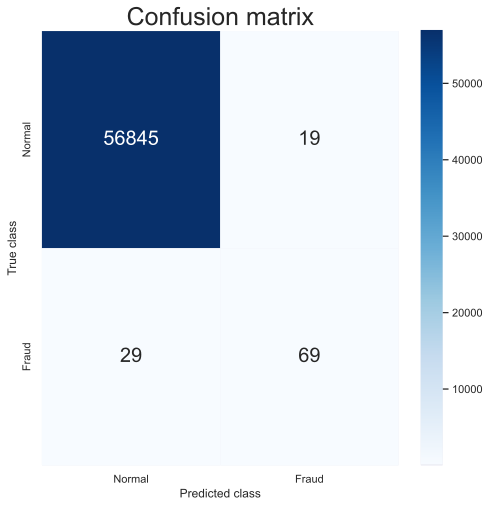

<Figure size 432x288 with 0 Axes>

In [105]:
LABELS = ['Normal', 'Fraud'] 
plt.figure(figsize =(8,8)) 
sns.heatmap(confusion_matrix(y_test, y_predict), xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d",  cmap="Blues",annot_kws={"size": 20}); 
plt.title("Confusion matrix",fontsize = 25) 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()
plt.savefig('finally model')

